In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [3]:
import GoH.reports
import GoH.utilities
import GoH.clean
import GoH.normalize
import re
import os
from os import listdir
from os.path import isfile, join
import collections

In [4]:
%matplotlib inline

In [5]:
wordlist_dir = "/Users/jeriwieringa/Dissertation/drafts/data/word-lists"
wordlists = ["2016-12-07-SDA-last-names.txt", 
             "2016-12-07-SDA-place-names.txt", 
             "2016-12-08-SDA-Vocabulary.txt", 
             "2017-01-03-place-names.txt", 
             "2017-02-14-Base-Word-List-SCOWL&KJV.txt",
             "2017-02-14-Roman-Numerals.txt",
             "2017-03-01-Additional-Approved-Words.txt"
            ]

In [6]:
spelling_dictionary = GoH.utilities.create_spelling_dictionary(wordlists, wordlist_dir)

In [7]:
title = "LB"

In [8]:
base_dir = "/Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/{}/".format(title)

## Baseline

In [9]:
cycle = 'baseline'

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/LB/baseline

Average verified rate: 0.9573822478765006

Average of error rates: 0.054559093619558734

Total token count: 5224513



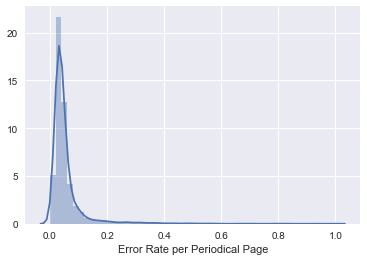

In [10]:
stats = GoH.reports.overview_report(join(base_dir, cycle), spelling_dictionary, title)

In [11]:
errors_summary = GoH.reports.get_errors_summary( stats )
GoH.reports.top_errors( errors_summary, 500 )

[('¥', 4001),
 ('m', 3562),
 ('-', 3386),
 ('e', 3325),
 ("'", 3217),
 ('d', 3161),
 ('w', 2673),
 (')', 2624),
 ('re-', 2372),
 ('con-', 2294),
 ('in-', 1955),
 ('tion', 1892),
 ('t', 1880),
 ('be-', 1710),
 ('n', 1653),
 ('r', 1344),
 ('*', 1295),
 ('f', 1195),
 ('ex-', 1097),
 ('¥¥', 1084),
 ('x', 1046),
 ('de-', 1026),
 ('com-', 972),
 ('ñ', 919),
 ('g', 895),
 ('mis-', 875),
 ('+', 853),
 ('dis-', 852),
 (']', 851),
 ('co', 833),
 ('ment', 819),
 ('en-', 668),
 ("workingmen's", 621),
 ('sub-', 619),
 ('un-', 615),
 ('per-', 597),
 ("prisoners'", 553),
 ('ñed', 523),
 ('tions', 507),
 ('k', 503)]

## Check Special Character Use

In [12]:
GoH.reports.tokens_with_special_characters(errors_summary)[:500]

[('¥', 4001),
 (')', 2624),
 ('*', 1295),
 ('¥¥', 1084),
 ('ñ', 919),
 ('+', 853),
 (']', 851),
 ('ñed', 523),
 ('(', 495),
 ('/', 425),
 ('_', 369),
 ('%', 332),
 ('(from', 247),
 ('•', 225),
 ('ñthe', 224),
 ('ö', 192),
 ('**', 164),
 ('ñen', 162),
 ('¥¥¥', 156),
 ('ña', 150),
 ('••', 145),
 ('[the', 130),
 ('ã', 129),
 ('(matt', 118),
 ('=', 117),
 ('(ps', 109),
 ('(isa', 108),
 ('(a)', 100),
 ('(for', 98),
 ('(the', 96),
 ('__', 95),
 ('ñi', 95),
 ('(c)', 93),
 ('(b)', 92),
 ('(john', 87),
 ('ñdan', 84),
 ('++', 81),
 ('[we', 77),
 ('(d)', 76),
 ('%x', 71),
 ('(luke', 70),
 ('chicagoñtrains', 68),
 ('(rom', 66),
 ('only)', 65),
 ('\\', 65),
 ('❑', 63),
 ('ñeditor', 60),
 ('(i', 59),
 ('[miss', 59),
 ('ñthat', 58),
 ('`', 56),
 ('¥¥¥¥', 50),
 ('(prov', 50),
 ('~~', 50),
 ('¡', 50),
 ('[mrs', 49),
 ('(gen', 49),
 ('(see', 48),
 ('ñit', 47),
 ('ô', 45),
 ('(acts', 45),
 ('ñselected', 45),
 ('[', 45),
 ('\ufeff', 44),
 ('ñand', 44),
 ('(heb', 44),
 ('____', 44),
 ('penitentiary)', 43),

## Correction 1 -- Normalize Characters

In [13]:
# %load shared_elements/normalize_characters.py
prev = 'baseline'
cycle = "correction1"

directories = GoH.utilities.define_directories(prev, cycle, base_dir)
if not os.path.exists(directories['cycle']):
    os.makedirs(directories['cycle'])

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

for filename in corpus:
    content = GoH.utilities.readfile(directories['prev'], filename)

    # Substitute for all other dashes
    content = re.sub(r"—-—–‑", r"-", content)

    # Substitute formatted apostrophe
    content = re.sub(r"\’\’\‘\'\‛\´", r"'", content)
    
    # Replace all special characters with a space (as these tend to occur at the end of lines)
    content = re.sub(r"[^a-zA-Z0-9\s,.!?$:;\-&\'\"]", r" ", content)
    
    with open(join(directories['cycle'], filename), mode="w") as o:
        o.write(content)
        o.close()

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/LB/correction1

Average verified rate: 0.9635807467075778

Average of error rates: 0.04575790101371498

Total token count: 5213259



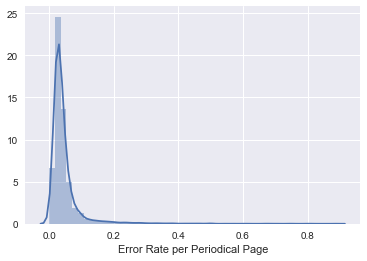

In [14]:
# %load shared_elements/summary.py
summary = GoH.reports.overview_report(directories['cycle'], spelling_dictionary, title)

In [15]:
# %load shared_elements/top_errors.py
errors_summary = GoH.reports.get_errors_summary( summary )
GoH.reports.top_errors( errors_summary, 10 )[:50]

[('-', 3638),
 ('m', 3600),
 ('e', 3417),
 ("'", 3337),
 ('d', 3272),
 ('w', 2711),
 ('re-', 2374),
 ('con-', 2295),
 ('t', 2024),
 ('in-', 1957),
 ('tion', 1900),
 ('be-', 1712),
 ('n', 1690),
 ('r', 1413),
 ('f', 1244),
 ('x', 1239),
 ('ex-', 1098),
 ('de-', 1027),
 ('com-', 973),
 ('g', 925),
 ('mis-', 876),
 ('dis-', 853),
 ('co', 845),
 ('ment', 821),
 ('en-', 669),
 ("workingmen's", 622),
 ('sub-', 619),
 ('un-', 615),
 ('per-', 599),
 ("prisoners'", 554),
 ('k', 519),
 ('tions', 508),
 ('some-', 495),
 ('th', 480),
 ('ac-', 454),
 ('im-', 453),
 ('ers', 452),
 ('to-', 446),
 ('ful', 433),
 ('chris-', 429),
 ('al-', 426),
 ('soul-winning', 426),
 ('oo', 422),
 ('pro-', 419),
 ('ad-', 416),
 ('an-', 402),
 ('ments', 399),
 ('pre-', 366),
 ('for-', 354),
 ('ap-', 347)]

## Correction 2 -- Correct Line Endings

In [16]:
# %load shared_elements/correct_line_endings.py
prev = cycle
cycle = "correction2"

directories = GoH.utilities.define_directories(prev, cycle, base_dir)
if not os.path.exists(directories['cycle']):
    os.makedirs(directories['cycle'])

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

for filename in corpus:
    content = GoH.utilities.readfile(directories['prev'], filename)

    content = re.sub(r"(\w+)(\-\s{1,})([a-z]+)", r"\1\3", content)

    with open(join(directories['cycle'], filename), mode="w") as o:
        o.write(content)
        o.close()

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/LB/correction2

Average verified rate: 0.9828071372542159

Average of error rates: 0.02732128801431127

Total token count: 5143995



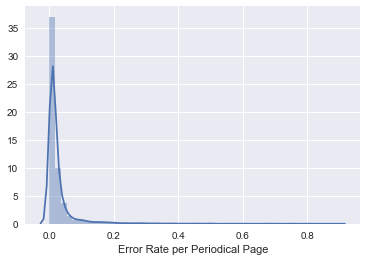

In [17]:
# %load shared_elements/summary.py
summary = GoH.reports.overview_report(directories['cycle'], spelling_dictionary, title)

In [18]:
# %load shared_elements/top_errors.py
errors_summary = GoH.reports.get_errors_summary( summary )
GoH.reports.top_errors( errors_summary, 10 )[:50]

[('m', 3596),
 ('-', 3572),
 ('e', 3414),
 ("'", 3337),
 ('d', 3267),
 ('w', 2711),
 ('t', 2008),
 ('n', 1687),
 ('r', 1404),
 ('x', 1238),
 ('f', 1238),
 ('g', 921),
 ('co', 831),
 ("workingmen's", 684),
 ("prisoners'", 589),
 ('k', 517),
 ('th', 479),
 ('soul-winning', 435),
 ('oo', 422),
 ('u', 297),
 ("'i", 226),
 ('red-letter', 220),
 ('--', 214),
 ('hsi', 213),
 ("'the", 210),
 ('anti-cigarette', 173),
 ('halsted', 164),
 ('z', 162),
 ("'tis", 160),
 ('wm', 158),
 ('mo', 158),
 ('rd', 141),
 ('pa', 138),
 ('seven-jeweled', 134),
 ('oc', 132),
 ('broken-hearted', 118),
 ('ti', 110),
 ('ft', 105),
 ('q', 91),
 ('harner', 91),
 ('sub-', 89),
 ('izer', 87),
 ('vapor-', 87),
 ('li', 87),
 ('con-', 86),
 ('pp', 84),
 ('mcauley', 83),
 ('al', 83),
 ('pavlson', 81),
 ('stapp', 80)]

## Correction 3 -- Remove Extra Dashes

In [19]:
# %load shared_elements/remove_extra_dashes.py
prev = cycle
cycle = "correction3"

directories = GoH.utilities.define_directories(prev, cycle, base_dir)
if not os.path.exists(directories['cycle']):
    os.makedirs(directories['cycle'])

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

for filename in corpus:
    content = GoH.utilities.readfile(directories['prev'], filename)
    
    text = re.sub(r"[0-9,!?$:;&]", " ", content)
    tokens = GoH.utilities.tokenize_text(text)
    
    replacements = []
    for token in tokens:
        if token[0] is "-":
            replacements.append((token, token[1:]))
            
        elif token[-1] is "-":
            replacements.append((token, token[:-1]))
        else:
            pass
        
    if len(replacements) > 0:
#         print("{}: {}".format(filename, replacements))
        
        for replacement in replacements:
            content = GoH.clean.replace_pair(replacement, content)
    else:
        pass

    with open(join(directories['cycle'], filename), mode="w") as o:
        o.write(content)
        o.close()

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/LB/correction3

Average verified rate: 0.9844966635129426

Average of error rates: 0.02491568276684556

Total token count: 5144183



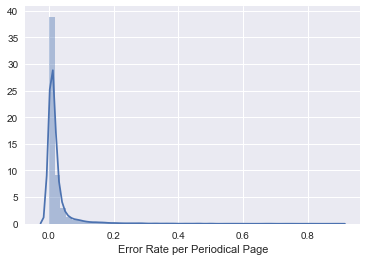

In [20]:
# %load shared_elements/summary.py
summary = GoH.reports.overview_report(directories['cycle'], spelling_dictionary, title)

In [21]:
# %load shared_elements/top_errors.py
errors_summary = GoH.reports.get_errors_summary( summary )
GoH.reports.top_errors( errors_summary, 10 )[:50]

[('m', 3607),
 ('e', 3441),
 ("'", 3378),
 ('d', 3292),
 ('w', 2726),
 ('t', 2047),
 ('n', 1700),
 ('r', 1435),
 ('x', 1275),
 ('f', 1251),
 ('g', 928),
 ('co', 885),
 ("workingmen's", 684),
 ("prisoners'", 589),
 ('k', 532),
 ('th', 482),
 ('oo', 423),
 ('soul-winning', 348),
 ('u', 309),
 ("'i", 227),
 ('hsi', 213),
 ("'the", 210),
 ('red-letter', 190),
 ('z', 166),
 ('halsted', 164),
 ("'tis", 160),
 ('wm', 159),
 ('mo', 159),
 ('rd', 141),
 ('pa', 141),
 ('anti-cigarette', 138),
 ('oc', 133),
 ('ex', 131),
 ('re', 125),
 ('ti', 120),
 ('ft', 106),
 ('broken-hearted', 101),
 ('seven-jeweled', 96),
 ('q', 95),
 ('harner', 91),
 ('al', 90),
 ('li', 89),
 ('izer', 87),
 ('-', 87),
 ('pp', 84),
 ('mcauley', 83),
 ('pavlson', 81),
 ('stapp', 80),
 ("'to", 75),
 ('ky', 75)]

## Correction 4 -- Remove Extra Quotation Marks

In [22]:
# %load shared_elements/replace_extra_quotation_marks.py
prev = cycle
cycle = "correction4"

directories = GoH.utilities.define_directories(prev, cycle, base_dir)
if not os.path.exists(directories['cycle']):
    os.makedirs(directories['cycle'])

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

for filename in corpus:
    content = GoH.utilities.readfile(directories['prev'], filename)
    
    text = re.sub(r"[0-9,!?$:;&]", " ", content)
    tokens = GoH.utilities.tokenize_text(text)
    
    corrections = []
    for token in tokens:
        token_list = list(token)
        last_char = token_list[-1]

        if last_char is "'":
            if len(token) > 1:
                if token_list[-2] is 's' or 'S':
                    pass
                else:
                    corrections.append((token, re.sub(r"'", r"", token)))
            else:
                pass
        elif token[0] is "'":
            corrections.append((token, re.sub(r"'", r"", token)))   
        else:
            pass
    
    if len(corrections) > 0:
#         print('{}: {}'.format(filename, corrections))

        for correction in corrections:
            content = GoH.clean.replace_pair(correction, content)
    else:
        pass

    with open(join(directories['cycle'], filename), mode="w") as o:
        o.write(content)
        o.close()

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/LB/correction4

Average verified rate: 0.9852831084376651

Average of error rates: 0.02378878950506858

Total token count: 5144089



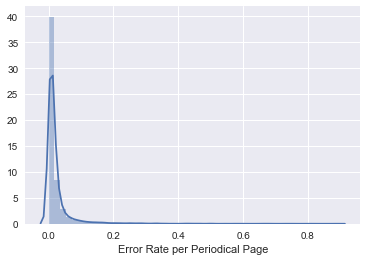

In [23]:
# %load shared_elements/summary.py
summary = GoH.reports.overview_report(directories['cycle'], spelling_dictionary, title)

In [24]:
# %load shared_elements/top_errors.py
errors_summary = GoH.reports.get_errors_summary( summary )
GoH.reports.top_errors( errors_summary, 10 )[:50]

[('m', 3611),
 ('e', 3456),
 ('d', 3295),
 ("'", 3226),
 ('w', 2728),
 ('t', 2079),
 ('n', 1707),
 ('r', 1441),
 ('x', 1280),
 ('f', 1260),
 ('g', 930),
 ('co', 888),
 ("workingmen's", 678),
 ("prisoners'", 585),
 ('k', 533),
 ('th', 482),
 ('oo', 428),
 ('soul-winning', 348),
 ('u', 310),
 ('hsi', 213),
 ('red-letter', 190),
 ('z', 169),
 ('halsted', 164),
 ('wm', 160),
 ('mo', 159),
 ('rd', 142),
 ('pa', 141),
 ('anti-cigarette', 138),
 ('oc', 133),
 ('ex', 131),
 ('re', 130),
 ('ti', 120),
 ('ft', 107),
 ('broken-hearted', 101),
 ('q', 97),
 ('seven-jeweled', 96),
 ('al', 93),
 ('harner', 91),
 ('li', 90),
 ('izer', 87),
 ('-', 87),
 ('pp', 84),
 ('mcauley', 83),
 ('pavlson', 81),
 ('stapp', 80),
 ('ky', 75),
 ('soulwinning', 74),
 ('ninety-six', 74),
 ('pearsons', 72),
 ('good-bye', 70)]

## Correction 5 -- Rejoin Burst Words

In [25]:
# %load shared_elements/rejoin_burst_words.py
prev = cycle
cycle = "correction5"

directories = GoH.utilities.define_directories(prev, cycle, base_dir)
if not os.path.exists(directories['cycle']):
    os.makedirs(directories['cycle'])

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

for filename in corpus:
    content = GoH.utilities.readfile(directories['prev'], filename)

    pattern = re.compile("(\s(\w{1,2}\s){5,})")
    
    replacements = []
    GoH.clean.check_splits(pattern, spelling_dictionary, content, replacements)
    
    if len(replacements) > 0:
#         print('{}: {}'.format(filename, replacements))

        for replacement in replacements:
            content = GoH.clean.replace_pair(replacement, content)
    else:
        pass

    with open(join(directories['cycle'], filename), mode="w") as o:
        o.write(content)
        o.close()

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/LB/correction5

Average verified rate: 0.9852801583159106

Average of error rates: 0.023788431723315448

Total token count: 5144145



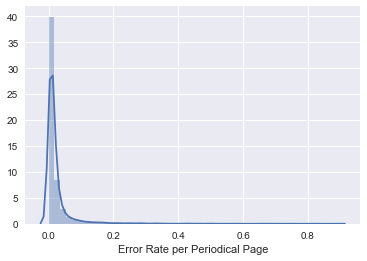

In [26]:
# %load shared_elements/summary.py
summary = GoH.reports.overview_report(directories['cycle'], spelling_dictionary, title)

In [27]:
# %load shared_elements/top_errors.py
errors_summary = GoH.reports.get_errors_summary( summary )
GoH.reports.top_errors( errors_summary, 10 )[:50]

[('m', 3610),
 ('e', 3451),
 ('d', 3295),
 ("'", 3226),
 ('w', 2728),
 ('t', 2080),
 ('n', 1706),
 ('r', 1437),
 ('x', 1280),
 ('f', 1259),
 ('g', 930),
 ('co', 888),
 ("workingmen's", 678),
 ("prisoners'", 585),
 ('k', 533),
 ('th', 482),
 ('oo', 428),
 ('soul-winning', 348),
 ('u', 309),
 ('hsi', 213),
 ('red-letter', 190),
 ('z', 169),
 ('halsted', 164),
 ('wm', 160),
 ('mo', 159),
 ('rd', 142),
 ('pa', 141),
 ('anti-cigarette', 138),
 ('oc', 133),
 ('ex', 131),
 ('re', 131),
 ('ti', 120),
 ('ft', 107),
 ('broken-hearted', 101),
 ('q', 97),
 ('seven-jeweled', 96),
 ('al', 93),
 ('harner', 91),
 ('li', 90),
 ('izer', 87),
 ('-', 87),
 ('pp', 84),
 ('mcauley', 83),
 ('pavlson', 81),
 ('stapp', 80),
 ('ky', 75),
 ('soulwinning', 74),
 ('ninety-six', 74),
 ('pearsons', 72),
 ('good-bye', 70)]

## Correction 6 -- Rejoin Split Words

In [28]:
# %load shared_elements/rejoin_split_words.py
prev = cycle
cycle = "correction6"

directories = GoH.utilities.define_directories(prev, cycle, base_dir)
if not os.path.exists(directories['cycle']):
    os.makedirs(directories['cycle'])

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

for filename in corpus:
    content = GoH.utilities.readfile(directories['prev'], filename)
    
    text = re.sub(r"[0-9,!?$:;&]", " ", content)
    tokens = GoH.utilities.tokenize_text(text)
    errors = GoH.reports.identify_errors(tokens, spelling_dictionary)

    replacements = GoH.clean.check_if_stem(errors, spelling_dictionary, tokens, get_prior=False)
    
    if len(replacements) > 0:
#         print('{}: {}'.format(filename, replacements))

        for replacement in replacements:
            content = GoH.clean.replace_split_words(replacement, content)
    else:
        pass

    with open(join(directories['cycle'], filename), mode="w") as o:
        o.write(content)
        o.close()

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/LB/correction6

Average verified rate: 0.9855275460757164

Average of error rates: 0.023463208109719743

Total token count: 5143219



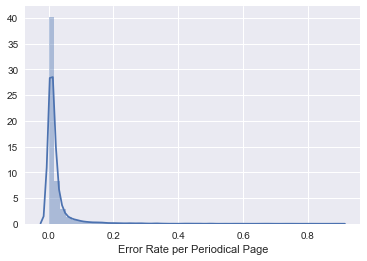

In [29]:
# %load shared_elements/summary.py
summary = GoH.reports.overview_report(directories['cycle'], spelling_dictionary, title)

In [30]:
# %load shared_elements/top_errors.py
errors_summary = GoH.reports.get_errors_summary( summary )
GoH.reports.top_errors( errors_summary, 10 )[:50]

[('m', 3608),
 ('e', 3419),
 ('d', 3290),
 ("'", 3226),
 ('w', 2726),
 ('t', 2072),
 ('n', 1698),
 ('r', 1425),
 ('x', 1280),
 ('f', 1257),
 ('g', 925),
 ('co', 837),
 ("workingmen's", 678),
 ("prisoners'", 585),
 ('k', 533),
 ('th', 464),
 ('oo', 415),
 ('soul-winning', 348),
 ('u', 307),
 ('hsi', 213),
 ('red-letter', 190),
 ('z', 169),
 ('halsted', 164),
 ('wm', 160),
 ('mo', 155),
 ('rd', 141),
 ('anti-cigarette', 138),
 ('pa', 136),
 ('oc', 133),
 ('ex', 113),
 ('ft', 107),
 ('broken-hearted', 101),
 ('q', 97),
 ('ti', 97),
 ('seven-jeweled', 96),
 ('harner', 91),
 ('izer', 87),
 ('-', 87),
 ('pp', 84),
 ('mcauley', 83),
 ('re', 82),
 ('pavlson', 81),
 ('stapp', 80),
 ('al', 78),
 ('ky', 75),
 ('soulwinning', 74),
 ('ninety-six', 74),
 ('pearsons', 72),
 ('li', 71),
 ('good-bye', 70)]

## Correction 7 -- Rejoin Split Words II

In [31]:
# %load shared_elements/rejoin_split_words.py
prev = cycle
cycle = "correction7"

directories = GoH.utilities.define_directories(prev, cycle, base_dir)
if not os.path.exists(directories['cycle']):
    os.makedirs(directories['cycle'])

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

for filename in corpus:
    content = GoH.utilities.readfile(directories['prev'], filename)
    
    text = re.sub(r"[0-9,!?$:;&]", " ", content)
    tokens = GoH.utilities.tokenize_text(text)
    errors = GoH.reports.identify_errors(tokens, spelling_dictionary)

    replacements = GoH.clean.check_if_stem(errors, spelling_dictionary, tokens, get_prior=True)
    
    if len(replacements) > 0:
#         print('{}: {}'.format(filename, replacements))

        for replacement in replacements:
            content = GoH.clean.replace_split_words(replacement, content)
    else:
        pass

    with open(join(directories['cycle'], filename), mode="w") as o:
        o.write(content)
        o.close()

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/LB/correction7

Average verified rate: 0.9856858140213685

Average of error rates: 0.023234227787716163

Total token count: 5142451



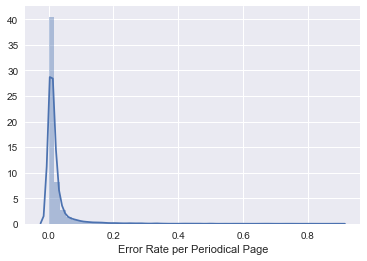

In [32]:
# %load shared_elements/summary.py
summary = GoH.reports.overview_report(directories['cycle'], spelling_dictionary, title)

In [33]:
# %load shared_elements/top_errors.py
errors_summary = GoH.reports.get_errors_summary( summary )
GoH.reports.top_errors( errors_summary, 10 )[:50]

[('m', 3593),
 ('e', 3408),
 ('d', 3287),
 ("'", 3226),
 ('w', 2715),
 ('t', 2056),
 ('n', 1693),
 ('r', 1397),
 ('x', 1280),
 ('f', 1247),
 ('g', 925),
 ('co', 837),
 ("workingmen's", 678),
 ("prisoners'", 585),
 ('k', 533),
 ('th', 458),
 ('oo', 387),
 ('soul-winning', 348),
 ('u', 307),
 ('hsi', 213),
 ('red-letter', 190),
 ('z', 167),
 ('halsted', 164),
 ('wm', 160),
 ('mo', 154),
 ('rd', 141),
 ('anti-cigarette', 138),
 ('pa', 136),
 ('oc', 133),
 ('ex', 112),
 ('ft', 102),
 ('broken-hearted', 101),
 ('q', 97),
 ('seven-jeweled', 96),
 ('harner', 91),
 ('-', 87),
 ('mcauley', 83),
 ('pp', 82),
 ('pavlson', 81),
 ('stapp', 80),
 ('ti', 79),
 ('al', 76),
 ('ky', 75),
 ('soulwinning', 74),
 ('ninety-six', 74),
 ('pearsons', 72),
 ('good-bye', 70),
 ('li', 70),
 ('heart-broken', 69),
 ('mt', 68)]

## Review Remaining Errors

In [34]:
GoH.reports.long_errors(errors_summary, min_length=20)

(['nittlitiltlitlitiltlitivtimmttim',
  'ageorsisommewesseesomsemowirmarnannwireormow',
  'tellwhenyoushippedthem',
  '------------------------------------------------------------------------',
  'foefbsomateanodnehawshomhisassedsuabnsycribed',
  'inhganedhsmamaegatozianey',
  'three-thousand-dollar',
  'toanswerlettersofinquiryfromeven',
  'hereweeseetheeseetheetherehe',
  'ininillimilligilninminine',
  'tarlgienrsegauniljeretaz',
  'cutthisadvertisementoutandsendtous',
  'afflivrtiiimorryamorwareswar',
  'maiiiiiiiiiiiiimmolluminmitilluniiiinnuiliifntimma',
  'emzerrialifkacesmlaiewn',
  'miavvaiminompantoakinmainmavwvit',
  'sionnuoioneenonomauevounownr',
  'pthcaotuldhappentothereformeddrunkardis',
  "andwewillforwardyouabo'x",
  'friaresmririiftwayvbro',
  'aosoilyreowswomozirmaanarrierionnewisresiwowzrowiwkrooisrowareci',
  'esireetheresibeisietesereeefee',
  'iiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiii',
  'atndaddmiirrattionfro',
  'illustrationsaccompanying',
  'hejeeemereeheeeeezieeeei

In [35]:
GoH.reports.docs_with_high_error_rate(summary)

[('LB19200201-V23-02-page36.txt', 0.889),
 ('LB19200601-V23-06-page36.txt', 0.81),
 ('LB19070101-V10-01-page2.txt', 0.75),
 ('LB19190401-V22-04-page14.txt', 0.733),
 ('LB19071101-V10-11-page2.txt', 0.684),
 ('LB19071001-V10-10-page1.txt', 0.676),
 ('LB19040101-V07-01-page1.txt', 0.667),
 ('LB19040401-V07-04-page2.txt', 0.656),
 ('LB19030601-V06-06-page2.txt', 0.6),
 ('LB19000801-V03-06-page2.txt', 0.583),
 ('LB19070801-V10-08-page2.txt', 0.571),
 ('LB19101001-V13-10-page2.txt', 0.545),
 ('LB19020401-V05-04-page14.txt', 0.5),
 ('LB19121201-V15-12-page16.txt', 0.5),
 ('LB19050601-V08-06-page21.txt', 0.5),
 ('LB19020401-V05-04-page6.txt', 0.5),
 ('LB19010401-V04-02-page2.txt', 0.5),
 ('LB19020801-V05-08-page36.txt', 0.467),
 ('LB19120501-V15-05-page2.txt', 0.466),
 ('LB19190701-V22-07-page4.txt', 0.464),
 ('LB19070701-V10-07-page2.txt', 0.462),
 ('LB19021001-V05-10-page36.txt', 0.449),
 ('LB19030101-V06-01-page1.txt', 0.444),
 ('LB19101201-V13-12-page2.txt', 0.444),
 ('LB19020901-V05-09-p

In [36]:
# %load shared_elements/high_error_rates.py
doc_keys = [x[0] for x in GoH.reports.docs_with_high_error_rate(summary) if x[1] > 0.4]

# GoH.utilities.open_original_docs(doc_keys, directories['cycle'])

High error documents are image pages, many of which were scanned upside-down and are uncorrectable algorithmically. 

## Correction 8 -- Remove long errors

In [37]:
# %load shared_elements/remove-tokens-with-long-strings-of-characters.py
prev = cycle
cycle = "correction8"

directories = GoH.utilities.define_directories(prev, cycle, base_dir)
if not os.path.exists(directories['cycle']):
    os.makedirs(directories['cycle'])

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

for filename in corpus:
    content = GoH.utilities.readfile(directories['prev'], filename)

    text = re.sub(r"[0-9,!?$:;&]", " ", content)
    tokens = GoH.utilities.tokenize_text(text)
    
    replacements = []
    replacements.append(GoH.clean.check_for_repeating_characters(tokens, "m|M"))
    replacements.append(GoH.clean.check_for_repeating_characters(tokens, "i|I"))
    replacements.append(GoH.clean.check_for_repeating_characters(tokens, "s|S"))
    replacements.append(GoH.clean.check_for_repeating_characters(tokens, "o|O"))
    replacements.append(GoH.clean.check_for_repeating_characters(tokens, "e|E"))
    
    replacements = [item for sublist in replacements for item in sublist]
            
    if len(replacements) > 0:
#         print('{}: {}'.format(filename, replacements))

        for replacement in replacements:
            content = GoH.clean.replace_pair(replacement, content)
    else:
        pass
    
    with open(join(directories['cycle'], filename), mode="w") as o:
        o.write(content)
        o.close()

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/LB/correction8

Average verified rate: 0.9857011567031103

Average of error rates: 0.02319988073941563

Total token count: 5142374



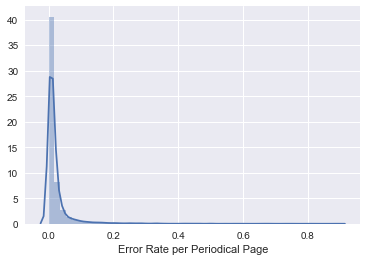

In [38]:
# %load shared_elements/summary.py
summary = GoH.reports.overview_report(directories['cycle'], spelling_dictionary, title)

In [39]:
# %load shared_elements/top_errors.py
errors_summary = GoH.reports.get_errors_summary( summary )
GoH.reports.top_errors( errors_summary, 10 )[:50]

[('m', 3593),
 ('e', 3408),
 ('d', 3287),
 ("'", 3226),
 ('w', 2715),
 ('t', 2056),
 ('n', 1693),
 ('r', 1397),
 ('x', 1280),
 ('f', 1247),
 ('g', 925),
 ('co', 837),
 ("workingmen's", 678),
 ("prisoners'", 585),
 ('k', 533),
 ('th', 458),
 ('oo', 387),
 ('soul-winning', 348),
 ('u', 307),
 ('hsi', 213),
 ('red-letter', 190),
 ('z', 167),
 ('halsted', 164),
 ('wm', 160),
 ('mo', 154),
 ('rd', 141),
 ('anti-cigarette', 138),
 ('pa', 136),
 ('oc', 133),
 ('ex', 112),
 ('ft', 102),
 ('broken-hearted', 101),
 ('q', 97),
 ('seven-jeweled', 96),
 ('harner', 91),
 ('-', 87),
 ('mcauley', 83),
 ('pp', 82),
 ('pavlson', 81),
 ('stapp', 80),
 ('ti', 79),
 ('al', 76),
 ('ky', 75),
 ('soulwinning', 74),
 ('ninety-six', 74),
 ('pearsons', 72),
 ('good-bye', 70),
 ('li', 70),
 ('heart-broken', 69),
 ('mt', 68)]

## Correction 9 -- Separate Squashed Words

In [40]:
# %load shared_elements/separate_squashed_words.py
import pandas as pd
from math import log

prev = cycle
cycle = "correction9"

directories = GoH.utilities.define_directories(prev, cycle, base_dir)
if not os.path.exists(directories['cycle']):
    os.makedirs(directories['cycle'])

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

verified_tokens = []

for filename in corpus:  
    content = GoH.utilities.readfile(directories['prev'], filename)
    GoH.normalize.get_approved_tokens(content, spelling_dictionary, verified_tokens)

tokens_with_freq = dict(collections.Counter(verified_tokens))
words = pd.DataFrame(list(tokens_with_freq.items()), columns=['token','freq'])
words_sorted = words.sort_values('freq', ascending=False)
words_sorted_short = words_sorted[words_sorted.freq > 2]

sorted_list_of_words = list(words_sorted_short['token'])

wordcost = dict((k, log((i+1)*log(len(sorted_list_of_words)))) for i,k in enumerate(sorted_list_of_words))
maxword = max(len(x) for x in sorted_list_of_words)

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

for filename in corpus:
    content = GoH.utilities.readfile(directories['prev'], filename)

    text = GoH.utilities.strip_punct(content)
    tokens = GoH.utilities.tokenize_text(text)
    
    replacements = []
    
    for token in tokens:
        if not token.lower() in spelling_dictionary:
            if len(token) > 17:
                if re.search(r"[\-\-\'\"]", token):
                    pass
                else:
                    split_string = GoH.normalize.infer_spaces(token, wordcost, maxword)
                    list_split_string = split_string.split()
                    
                    if GoH.normalize.verify_split_string(list_split_string, spelling_dictionary):
                        replacements.append((token, split_string))
                    else:
                        pass
            else:
                pass
        else:
            pass
        
    if len(replacements) > 0:
        print("{}: {}".format(filename, replacements))
        
        for replacement in replacements:
            content = GoH.clean.replace_pair(replacement, content)
    
    else:
        pass

    with open(join(directories['cycle'], filename), mode="w") as o:
        o.write(content)
        o.close()

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/LB/correction9

Average verified rate: 0.9857117078086152

Average of error rates: 0.023180083482409065

Total token count: 5142602



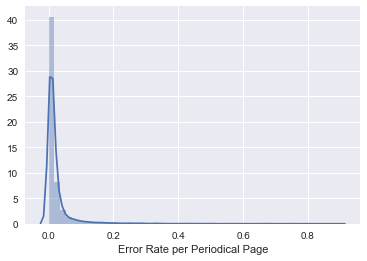

In [41]:
# %load shared_elements/summary.py
summary = GoH.reports.overview_report(directories['cycle'], spelling_dictionary, title)

In [42]:
# %load shared_elements/top_errors.py
errors_summary = GoH.reports.get_errors_summary( summary )
GoH.reports.top_errors( errors_summary, 10 )[:50]

[('m', 3593),
 ('e', 3412),
 ('d', 3287),
 ("'", 3226),
 ('w', 2717),
 ('t', 2057),
 ('n', 1694),
 ('r', 1398),
 ('x', 1280),
 ('f', 1248),
 ('g', 925),
 ('co', 837),
 ("workingmen's", 678),
 ("prisoners'", 585),
 ('k', 533),
 ('th', 458),
 ('oo', 387),
 ('soul-winning', 348),
 ('u', 307),
 ('hsi', 213),
 ('red-letter', 190),
 ('z', 167),
 ('halsted', 164),
 ('wm', 160),
 ('mo', 154),
 ('rd', 141),
 ('anti-cigarette', 138),
 ('pa', 136),
 ('oc', 133),
 ('ex', 112),
 ('ft', 102),
 ('broken-hearted', 101),
 ('q', 97),
 ('seven-jeweled', 96),
 ('harner', 91),
 ('-', 87),
 ('mcauley', 83),
 ('pp', 82),
 ('pavlson', 81),
 ('stapp', 80),
 ('ti', 79),
 ('al', 76),
 ('ky', 75),
 ('soulwinning', 74),
 ('ninety-six', 74),
 ('pearsons', 72),
 ('good-bye', 70),
 ('li', 70),
 ('heart-broken', 69),
 ('mt', 68)]